Name

In [ ]:
# Reyna Tovar

Labpartner(s)

In [ ]:
# Adam Sanjar

In [17]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import cartopy as ccrs

# Class 10.1

# Warmups 10.1

If you do not complete the warmup during the class period, complete for homework and review/expand for weekly practice. These are basic coding skills you need to be comfortable with. Work on the following for 25 min and then we will go over them together:

**W.1** Write a function that given two numbers returns the maximum. Figure out the maximum number using logical control (no pre-made max functions)

In [6]:
#input: two numbers
#output is bigger number

def max_num(num1, num2):
    #if first numb is bigger return 
    if num1 > num2:
        return num1
    else: 
        return num2
#else return sec numb   

In [7]:
max_num(10,23)

23

In [9]:
max_num(-10, 23)

23

In [10]:
#Write a function that given two numbers returns the maximum. 
#Figure out the maximum number using logical control (no pre-made max functions)

def maximum(Y, Z): 
      
    if Y >= Z: 
        return Y 
    else: 
        return Z 
      

Y = 7
Z = 9
print(maximum(Y, Z)) 

9


In [11]:
# Or using the max() function
a = 77
b = 95
  
maximum = max(a, b) 
print(maximum) 

95


**W.2** Modify the function we developed in Lab. 9.2 W.1 to return n consective even integers

In [12]:
def even(n):
    return [num for num in range(0, n*2+1,2)]
even(5)

[0, 2, 4, 6, 8, 10]

# Lecture 10.1

### Agenda:
- Announcements
    - changes in gradiing proccess, deadlines
    - Done with datacamp
- Shoutouts for good work (Paola, Luz)
- Lab 7.2 review
- Cartopy
- Movies (with Victoria Garza)


#### Announcements

Because my health has improved since the beginning of the term, and as we move into the more advanced material, I am taking over the grading from Adrian. Join me in thanking him for his assistance to us all in a time of need. I am working on catching up on the grading now and will finish this next week. So check your grades for updates and to see if you need to redo anything. I have added my research assistant and scientific programmer Victoria Garza to slack. She is available to you all for questions as we move into the advanced material.

I did go back and re-grade some labs (4.2 in particular) as I noted they were missing some material. Please see my notes if your grade changed and submit the missing material.

Previously I mentioned that no late labs will be accepted after 4/15, at which time you all will be working on your final projects. **Further, all labs through Lab 9.2 need to have a satisfactory grade (no zeros) by 4/1 to pass the class.** Reminder thet the last drop date is 4/6. The mastery of this beginning material is needed to complete this course. This includes the functions exercise and the expected grade assignment.

We are done with datacamp! (But feel free to use it as a resource as you like)

#### Shoutouts

- Paola is student of the week for all of her excellent work, well done! 
- Luz did a great job on her CV, very creative.


### Main Lecture

#### Motivation: making nice maps and animating data are great skills for scientists to engage audiences with our results, but also to better understand the systems we are studying. 

Examples:
- Gulf of Mexico sattellite data animation
- Animation from recent SEEMS seminar speaker Dr. Scott James from Baylor


#### 7.2 Review
Today we are building on what we did in Lab 7.2, which was using xarray to plot ocean model output. The vast majority of you did not complete this lab satisfactorily, which probably had something to do with it being the week after the freeze.

pip install netCDF4Since the url I used before is no longer valid, I'm going to use the netcdf subset option on the HYCOM website, which also lets me get a subset of the data (and thus a smaller file). See https://www.hycom.org/data/gomu0pt04/expt-90pt1m000 data access button

In [19]:
pip install netCDF4

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [6]:
file = 'https://tds.hycom.org/thredds/dodsC/GOMu0.04/expt_90.1m000/FMRC/runs/GOMu0.04_901m000_FMRC_RUN_2021-03-20T12:00:00Z'

In [7]:
ssh_data = xr.open_dataset(file, decode_times=False)

In [8]:
ssh_data

<xarray.Dataset>
Dimensions:      (depth: 40, lat: 346, lon: 541, time: 121, time_1: 1)
Coordinates:
  * depth        (depth) float64 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * lat          (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon          (lon) float64 -98.0 -97.96 -97.92 ... -76.48 -76.44 -76.4
  * time         (time) float64 24.0 25.0 26.0 27.0 ... 141.0 142.0 143.0 144.0
Dimensions without coordinates: time_1
Data variables:
    tau          (time_1) float64 ...
    time_offset  (time) float64 ...
    water_u      (time, depth, lat, lon) float32 ...
    water_v      (time, depth, lat, lon) float32 ...
    water_temp   (time, depth, lat, lon) float32 ...
    salinity     (time, depth, lat, lon) float32 ...
    surf_el      (time, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   archv2ncdf3z ;\nFMRC Run 2021-03-20T12:00:00Z ...
    field_type:                instantaneous
    Conventions:               CF-1.4, NAVO_netcdf_v1.1
    _CoordSysBuilder:          ucar.nc2.dataset.conv.CF1Convention
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:GOMu0.04_901m000_FMRC

In [9]:
ssh_data.lat.min()

<xarray.DataArray 'lat' ()>
array(18.12000084)

In [10]:
ssh_data.lat.max()

<xarray.DataArray 'lat' ()>
array(31.92000008)

In [18]:
ssh_data.lon.min()

<xarray.DataArray 'lon' ()>
array(-98.)

In [20]:
ssh_data.lon.max()

<xarray.DataArray 'lon' ()>
array(-76.40002441)

In [ ]:
ssh_data.surf_el.plot()

#### Cartopy https://scitools.org.uk/cartopy/docs/latest/

Now let's make a nice plot using Catopy

In [11]:
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

There are a number of differnt map projections available in Cartopy.  

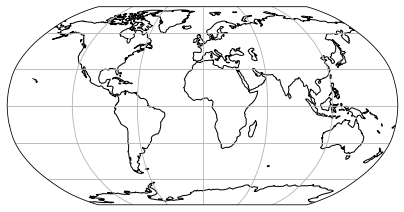

In [12]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m')
ax.gridlines()

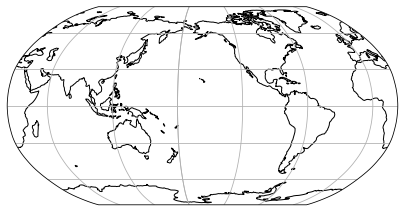

In [28]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 203)) # this rotates the emap EAST
ax.coastlines(resolution='110m')
ax.gridlines()

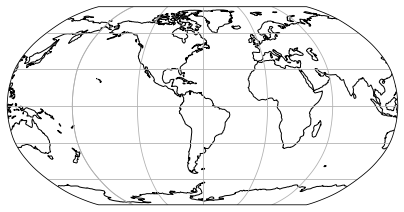

In [13]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 300))
ax.coastlines(resolution='110m')
ax.gridlines()

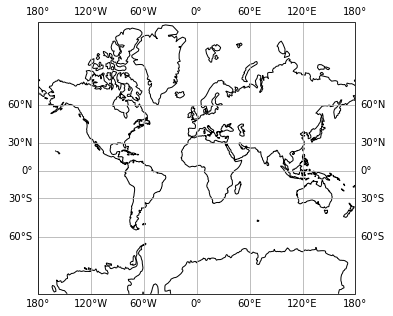

In [14]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mercator()) # different map projection
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)


# note this has grid labels, this is being updated for all projections in the latest version of cartopy 0.18.0

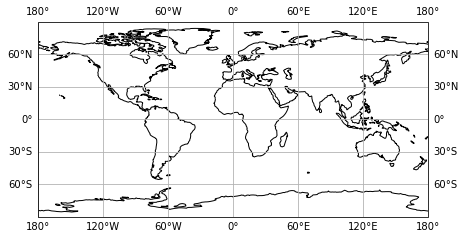

In [15]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

# -60 (60 W) is the same as 300 E (360 degrees in total 360-60W=300E)

Let's zoom into the Gulf of Mexico. We want to set the lat and lon range to match our HYCOM data. How do we find this?

In [45]:
ssh_data

<xarray.Dataset>
Dimensions:      (depth: 40, lat: 346, lon: 541, time: 121, time_1: 1)
Coordinates:
  * depth        (depth) float64 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * lat          (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon          (lon) float64 -98.0 -97.96 -97.92 ... -76.48 -76.44 -76.4
  * time         (time) float64 24.0 25.0 26.0 27.0 ... 141.0 142.0 143.0 144.0
Dimensions without coordinates: time_1
Data variables:
    tau          (time_1) float64 114.0
    time_offset  (time) float64 0.0 1.0 2.0 3.0 4.0 ... 117.0 118.0 119.0 120.0
    water_u      (time, depth, lat, lon) float32 ...
    water_v      (time, depth, lat, lon) float32 ...
    water_temp   (time, depth, lat, lon) float32 ...
    salinity     (time, depth, lat, lon) float32 ...
    surf_el      (time, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   archv2ncdf3z ;\nFMRC Run 2021-03-20T12:00:00Z ...
    field_type:                instantaneous
    Conventions:               CF-1.4, NAVO_netcdf_v1.1
    _CoordSysBuilder:          ucar.nc2.dataset.conv.CF1Convention
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:GOMu0.04_901m000_FMRC

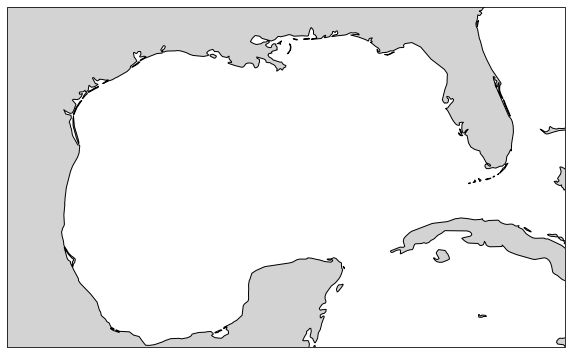

In [21]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 
#ax.set_extent([])
#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgray')
ax.add_feature(land_50m)

Now let's add some data

In [22]:
# what does our data look like again?
ssh_data

<xarray.Dataset>
Dimensions:      (depth: 40, lat: 346, lon: 541, time: 121, time_1: 1)
Coordinates:
  * depth        (depth) float64 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * lat          (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon          (lon) float64 -98.0 -97.96 -97.92 ... -76.48 -76.44 -76.4
  * time         (time) float64 24.0 25.0 26.0 27.0 ... 141.0 142.0 143.0 144.0
Dimensions without coordinates: time_1
Data variables:
    tau          (time_1) float64 118.0
    time_offset  (time) float64 0.0 1.0 2.0 3.0 4.0 ... 117.0 118.0 119.0 120.0
    water_u      (time, depth, lat, lon) float32 ...
    water_v      (time, depth, lat, lon) float32 ...
    water_temp   (time, depth, lat, lon) float32 ...
    salinity     (time, depth, lat, lon) float32 ...
    surf_el      (time, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   archv2ncdf3z ;\nFMRC Run 2021-03-20T12:00:00Z ...
    field_type:                instantaneous
    Conventions:               CF-1.4, NAVO_netcdf_v1.1
    _CoordSysBuilder:          ucar.nc2.dataset.conv.CF1Convention
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:GOMu0.04_901m000_FMRC

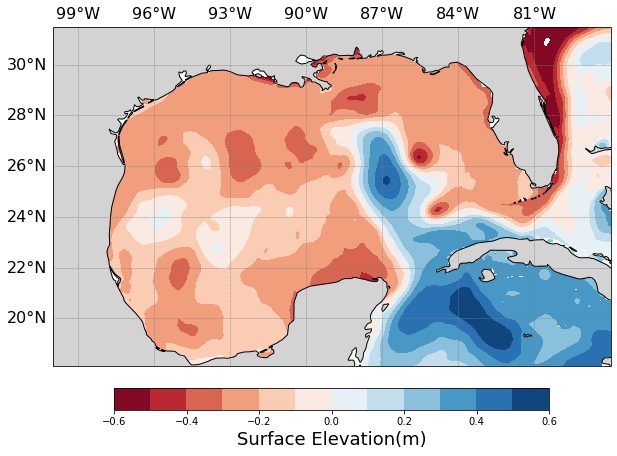

In [34]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

# let's fill in the following:
x = ssh_data.lon
y = ssh_data.lat
var =  ssh_data.surf_el[0,:,:]

#Contours the data on tho the map projection
step = np.arange(-0.6,0.7,0.1)
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu', 
                vmin = -0.6, vmax = 0.6, levels = step) 
# projection is needed in every plot call

#Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Surface Elevation" + '(m)', size = 18)

 ##Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
        #and sets the grid lines on the graph
    ##Set the grid lines to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
            linewidth=.5, color='gray', linestyle='--')
gl.xlabels_top = True    
gl.ylabels_left = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size' : 16}
gl.ylabel_style = {'size' : 16}
    

Now I'm going to take a bunch of features from Victoria's demo (in github as Hycom-CartopyDemo) and add them in.

#### Making Movies demo by Victoria 
(also see ppt slides in github)

# Lab 10.1

**E.1** Pick two of the examples in the Cartopy gallery (https://scitools.org.uk/cartopy/docs/latest/gallery/index.html) and go through the code. Make three modifications for each of the two examples and document what you did.

In [35]:
%matplotlib inline

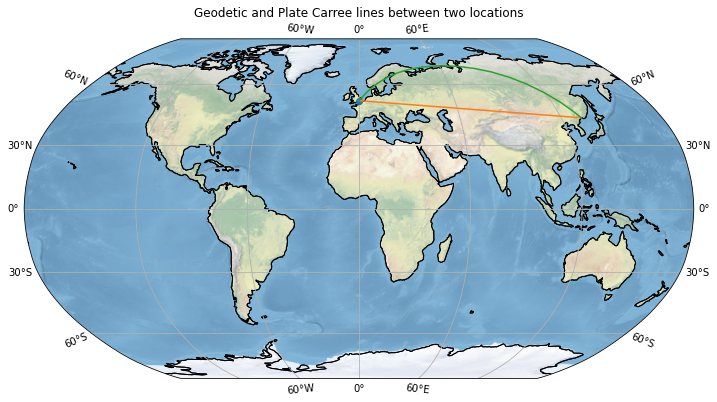

In [95]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs


def main():
    fig = plt.figure(figsize=(12, 7)) # (1) made fig size bigger
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

    
    ax.set_global()

    ax.stock_img()
    ax.coastlines()
    ax.gridlines(draw_labels=True)  # (2) added gridlines
    ax.coastlines(resolution='110m') # (3) added coastline resolution
    ax.set_title('Geodetic and Plate Carree lines between two locations')

    ax.plot(-0.08, 51.53, 'o', transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.PlateCarree())
    ax.plot([-0.08, 132], [51.53, 43.17], transform=ccrs.Geodetic())

    plt.show()


if __name__ == '__main__':
    main()

In [ ]:
%matplotlib inline

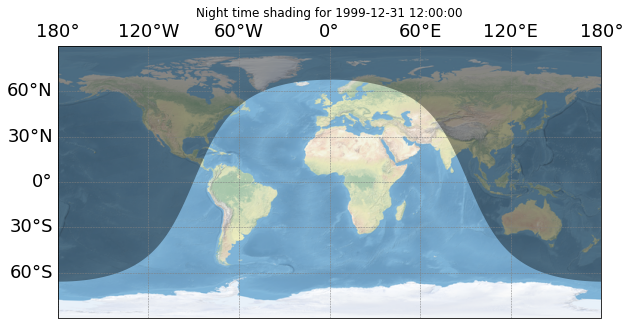

In [98]:
import datetime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
            linewidth=.5, color='gray', linestyle='--')

gl.xlabels_top = True    #(1) added labels
gl.ylabels_left = True

gl.xlabel_style = {'size' : 18} #(2) made plot bigger
gl.ylabel_style = {'size' : 18}

date = datetime.datetime(1999, 12, 31, 12)


ax.set_title('Night time shading for {}'.format(date))
ax.stock_img()
ax.add_feature(Nightshade(date, alpha=0.4)) #(3)made shade darker
plt.show()

**E.2** Download and plot HYCOM sea surface temperature for two diferent days (perhaps different seasons or sequential days, up to you) using cartopy. Add a grid, lat/lon labels, and annotate by adding a marker of the city/town you are living in. Make sure you adjust the colorbar to be a good fit to the data.


In [44]:
file = 'https://tds.hycom.org/thredds/dodsC/GOMu0.04/expt_90.1m000/FMRC/runs/GOMu0.04_901m000_FMRC_RUN_2021-03-24T12:00:00Z'

In [45]:
sea_temp = xr.open_dataset(file, decode_times=False)

In [46]:
sea_temp

<xarray.Dataset>
Dimensions:      (depth: 40, lat: 346, lon: 541, time: 133, time_1: 1)
Coordinates:
  * depth        (depth) float64 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * lat          (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon          (lon) float64 -98.0 -97.96 -97.92 ... -76.48 -76.44 -76.4
  * time         (time) float64 120.0 121.0 122.0 123.0 ... 250.0 251.0 252.0
Dimensions without coordinates: time_1
Data variables:
    tau          (time_1) float64 ...
    time_offset  (time) float64 ...
    water_u      (time, depth, lat, lon) float32 ...
    water_v      (time, depth, lat, lon) float32 ...
    water_temp   (time, depth, lat, lon) float32 ...
    salinity     (time, depth, lat, lon) float32 ...
    surf_el      (time, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   archv2ncdf3z ;\nFMRC Run 2021-03-24T12:00:00Z ...
    field_type:                instantaneous
    Conventions:               CF-1.4, NAVO_netcdf_v1.1
    _CoordSysBuilder:          ucar.nc2.dataset.conv.CF1Convention
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:GOMu0.04_901m000_FMRC

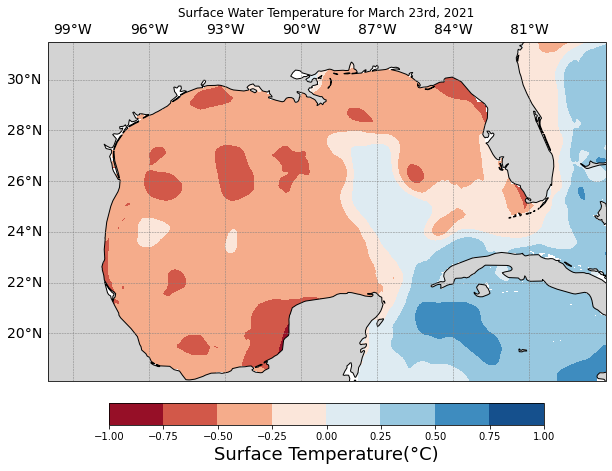

In [101]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

# let's fill in the following:
x = sea_temp.lon
y = sea_temp.lat
var =  sea_temp.surf_el[0,:,:]

 #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Surface Temperature" +'(\N{DEGREE SIGN}C)', size = 18)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
              linewidth=.5, color='gray', linestyle='--')
gl.xlabels_top = True    
gl.ylabels_left = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size' : 14}
gl.ylabel_style = {'size' : 14}

#Contours the data on tho the map projection

p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu')
ax.set_title('Surface Water Temperature for March 23rd, 2021')
plt.savefig('sea_temp')
#ax.plot(25.9017, 97.4975, 'bo', markersize=50, transform=ccrs.Geodetic())
#ax.text(25, 33, 'Brownsville', transform=ccrs.Geodetic())

**E.3** Animate some data. Using Davinci or the movie software of your choice, create an animated plot. This can be of any data you like. Put the code you used to plot here, and upload the resulting movie file to github.

You will demonstrate your animation to the class next Monday.

In [72]:
otherfile = 'https://tds.hycom.org/thredds/dodsC/GOMu0.04/expt_90.1m000/FMRC/runs/GOMu0.04_901m000_FMRC_RUN_2021-03-25T12:00:00Z'

In [73]:
sea_temp25 = xr.open_dataset(otherfile, decode_times=False)

In [74]:
sea_temp25

<xarray.Dataset>
Dimensions:      (depth: 40, lat: 346, lon: 541, time: 133, time_1: 1)
Coordinates:
  * depth        (depth) float64 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * lat          (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
  * lon          (lon) float64 -98.0 -97.96 -97.92 ... -76.48 -76.44 -76.4
  * time         (time) float64 120.0 121.0 122.0 123.0 ... 250.0 251.0 252.0
Dimensions without coordinates: time_1
Data variables:
    tau          (time_1) float64 ...
    time_offset  (time) float64 ...
    water_u      (time, depth, lat, lon) float32 ...
    water_v      (time, depth, lat, lon) float32 ...
    water_temp   (time, depth, lat, lon) float32 ...
    salinity     (time, depth, lat, lon) float32 ...
    surf_el      (time, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   archv2ncdf3z ;\nFMRC Run 2021-03-25T12:00:00Z ...
    field_type:                instantaneous
    Conventions:               CF-1.4, NAVO_netcdf_v1.1
    _CoordSysBuilder:          ucar.nc2.dataset.conv.CF1Convention
    cdm_data_type:             GRID
    featureType:               GRID
    location:                  Proto fmrc:GOMu0.04_901m000_FMRC

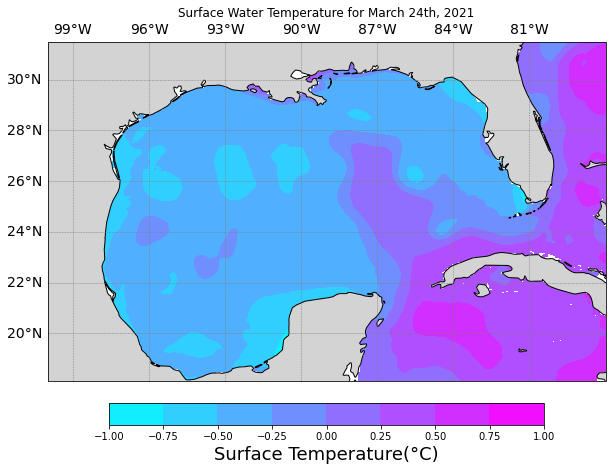

In [99]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

# let's fill in the following:
x = sea_temp25.lon
y = sea_temp25.lat
var =  sea_temp25.surf_el[0,:,:]

 #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label("Surface Temperature" +'(\N{DEGREE SIGN}C)', size = 18)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
              linewidth=.5, color='gray', linestyle='--')
gl.xlabels_top = True    
gl.ylabels_left = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size' : 14}
gl.ylabel_style = {'size' : 14}

#Contours the data on tho the map projection

p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'cool')
ax.set_title('Surface Water Temperature for March 24th, 2021')

plt.savefig('sea_temp25')

#ax.plot(25.9017, 97.4975, 'bo', markersize=50, transform=ccrs.Geodetic())
#ax.text(25, 33, 'Brownsville', transform=ccrs.Geodetic())

**E.3** Animate some data. Using Davinci or the movie software of your choice, create an animated plot. This can be of any data you like. Put the code you used to plot here, and upload the resulting movie file to github.

You will demonstrate your animation to the class next Monday.